In [3]:
import sys
sys.path.append('../')
sys.path.append('/Users/sdbykov/work/my_packages/nway')

In [4]:
from scripts.utils import data_path, set_mpl
from scripts.cross_match_scripts import fits_to_pandas, pandas_to_fits, assess_goodnes_of_cross_match
import pandas as pd
import numpy as np
import seaborn as sns
import nway_python_api as nway
%matplotlib inline

# Nway run in distnce-only mode

In [5]:
ero_table = nway.table_from_fits(data_path+'ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_table = nway.table_from_fits(data_path+'desi_lh.fits', poserr_value=0.1)
ero_pandas = fits_to_pandas('ERO_lhpv_03_23_sd01_a15_g14.fits')
desi_pandas = fits_to_pandas('desi_lh.fits')

ero_ctps_pandas = pd.read_pickle(data_path+'validation_ctps_ero_desi_lh.pkl')
ero_pandas = ero_pandas.merge(ero_ctps_pandas, on='ID', how='left')

nway_args = {'match_radius':30, 'prior_completeness':1,}

ero_pandas


,EROSITA,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp
0,0,b'SRGe J103744.3+571156',159.434594,57.198788,0.729711,3.284168e-12,NaN
1,1,b'SRGe J110137.5+572926',165.406353,57.490464,0.766567,1.969860e-12,NaN
2,2,b'SRGe J110537.6+585120',166.406669,58.855424,0.742422,1.505411e-12,NaN
3,3,b'SRGe J102349.9+563347',155.958041,56.563186,0.724683,1.001123e-12,NaN
4,4,b'SRGe J105057.2+593215',162.738144,59.537414,0.729755,9.137326e-13,NaN
...,...,...,...,...,...,...,...
9210,9210,b'SRGe J102315.1+561957',155.813071,56.332561,4.389278,1.637604e-15,NaN
9211,9211,b'SRGe J102332.5+562524',155.885436,56.423270,3.578448,1.608667e-15,NaN
9212,9212,b'SRGe J102235.0+561919',155.645874,56.321872,3.361668,1.595806e-15,NaN
9213,9213,b'SRGe J102223.5+562357',155.597875,56.399058,3.662990,1.532857e-15,NaN


In [6]:

nway_res_ero = nway.nwaylib.nway_match(
[ero_table, desi_table],
**nway_args
)

# nway_res_ero_random = nway.nwaylib.nway_match(
# [ero_random_table, desi_table],
# **nway_args
# )
#nway.calibrate_cutoff(nway_res_ero, nway_res_ero_random);

    adding angular separation columns
matching: 145069 matches after filtering by search radius
Primary catalogue "EROSITA" (9215), density gives 2.10e+07 objects on entire sky
Catalogue "DESI" (2418574), density gives 2.39e+09 objects on entire sky
Computing distance-based probabilities ...
    correcting for unrelated associations ...
100%|██████████| 9215/9215 [00:02<00:00, 3477.75it/s]

Computing final probabilities ...
    grouping by primary catalogue ID and flagging ...


In [7]:
nway_res_ero  = nway_res_ero.merge(ero_pandas, on='EROSITA')
nway_res_ero  = nway_res_ero.merge(desi_pandas, on='DESI')
nway_res_ero.sort_values(by=['EROSITA', 'prob_this_match' ], inplace=True, ascending=[True, False])
nway_res_ero.to_pickle(data_path+'ERO_lhpv_03_23_sd01_a15_g14_nway_distance_only.pkl')

 Completeness = 85% 
 Purity = 86% 
 prob_has_match optimal cutoff =  0.62 
 Fraction of sources with prob_has_match > 0.62 = 73%
 NOT HOSTLESS 
assigned NOT HOSTLESS: 570
assigned NOT HOSTLESS with correct match: 490
total: 667
purity [assigned NOT HOSTLESS correctly / all NOT HOSTLESS]: 0.8596491228070176
completeness [all NOT HOSTLESS / total NOT HOSTLESS]: 0.8545727136431784
 HOSTLESS 
assigned HOSTLESS: 12
assigned HOSTLESS correctly: 12
total HOSTLESS: 15
purity [assigned HOSTLESS correctly / all assigned HOSTLESS]: 1.0
completeness [all HOSTLESS assigned / total HOSTLESS]: 0.8


,EROSITA,DESI,Separation_EROSITA_DESI,Separation_max,ncat,dist_bayesfactor_uncorrected,dist_bayesfactor,dist_post,p_single,match_flag,prob_has_match,prob_this_match,ID,RA,DEC,pos_err,ML_FLUX_0,desi_id_true_ctp,desi_id,ra,dec,rel_dered_mag_g,rel_dered_mag_r,rel_dered_mag_z,rel_dered_mag_w1,rel_dered_mag_w2,rel_dered_mag_w3,rel_dered_mag_w4,rel_dered_g_r,rel_dered_r_z,rel_dered_g_z,rel_dered_z_w1,rel_dered_r_w2,rel_dered_w1_w2,rel_dered_z_w3,rel_dered_r_w4,rel_dered_w3_w4,prior_type,nnmag_grzw1w2,nnmag_grzw1w2_orig,nnmag_grzw1,nnmag_grzw1_orig,nnmag_grz,nnmag_grz_orig,rel_dered_mag_g_orig,rel_dered_mag_r_orig,rel_dered_mag_z_orig,rel_dered_mag_w1_orig,rel_dered_mag_w2_orig,rel_dered_mag_w3_orig,rel_dered_mag_w4_orig,rel_dered_g_r_orig,rel_dered_r_z_orig,rel_dered_g_z_orig,rel_dered_z_w1_orig,rel_dered_r_w2_orig,rel_dered_w1_w2_orig,rel_dered_z_w3_orig,rel_dered_r_w4_orig,rel_dered_w3_w4_orig
629,39,193604,0.423018,0.423018,2,11.080959,11.080959,0.980542,0.980542,1,0.986383,0.695677,b'SRGe J104117.7+584929',160.323629,58.824642,0.774481,2.361506e-13,9011_613766_43,9011_613766_39,160.323494,58.824548,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2',0.308889,0.308889,-99.000000,0.590108,-99.0,0.612539,21.617065,20.071016,18.908691,18.014496,18.534338,NaN,NaN,1.546049,1.162325,2.708374,0.894195,1.536678,-0.519842,NaN,NaN,NaN
712,44,1445,0.616340,0.616340,2,11.009321,11.009321,0.977133,0.977133,1,0.977133,1.000000,b'SRGe J103618.3+581246',159.076205,58.212688,0.774599,2.214497e-13,9011_612250_2743,9011_612250_2743,159.076381,58.212831,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,0.406921,0.432017,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.000000,0.020576,-0.137129,-0.087835,b'grzw1w2',0.856201,0.856201,-99.000000,0.933834,-99.0,0.759039,13.252994,13.749300,14.448002,11.917317,12.584514,14.242238,15.120586,-0.496306,-0.698702,-1.195008,2.530685,1.164786,-0.667197,0.205764,-1.371286,-0.878348
927,59,42150,0.846638,0.846638,2,10.870823,10.870823,0.968811,0.968811,1,0.968859,0.998414,b'SRGe J105316.7+573551',163.319421,57.597379,0.813768,1.725409e-13,9011_609950_3809,9011_609950_3809,163.319852,57.597425,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,0.470493,0.412812,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.000000,0.206193,0.413926,0.201885,b'grzw1w2',0.962702,0.962702,-99.000000,0.930767,-99.0,0.536829,19.056164,18.587671,18.529188,17.950235,17.488895,16.467258,14.448413,0.468493,0.058483,0.526976,0.578953,1.098776,0.461340,2.061930,4.139258,2.018845
986,63,176,1.209399,1.209399,2,10.630145,10.630145,0.946941,0.946941,1,0.951189,0.915826,b'SRGe J105300.9+574208',163.253903,57.702143,0.816646,1.645794e-13,9011_610726_375,9011_610726_375,163.254487,57.702268,0.311216,-99.0,0.399685,0.312928,0.321008,0.392139,-99.000000,-99.0,-99.0,-0.309639,0.303649,-99.0,-0.028282,0.026411,-99.000000,-99.000000,b'None',-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.000000,10.892570,NaN,13.988961,10.952471,11.235287,13.724852,NaN,NaN,NaN,-3.096391,3.036490,NaN,-0.282816,0.264109,NaN,NaN
1175,77,104087,0.531212,0.531212,2,10.993143,10.993143,0.976285,0.976285,1,0.976285,1.000000,b'SRGe J104144.5+594258',160.435424,59.716091,0.835654,1.462046e-13,9011_616727_1391,9011_616727_1391,160.435399,59.715943,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.0,-99.0,-99.000000,-99.000000,-99.0,-99.000000,-99.000000,-99.000000,-99.000000,b'grzw1w2',0.551066,0.551066,-99.000000,0.797608,-99.0,0.617739,20.679901,19.735455,19.047152,18.425570,18.786894,NaN,NaN,0.944446,0.688303,1.632749,0.621582,0.948561,-0.361324,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131998,8934,256345,4.590860,4.590860,2,9.405

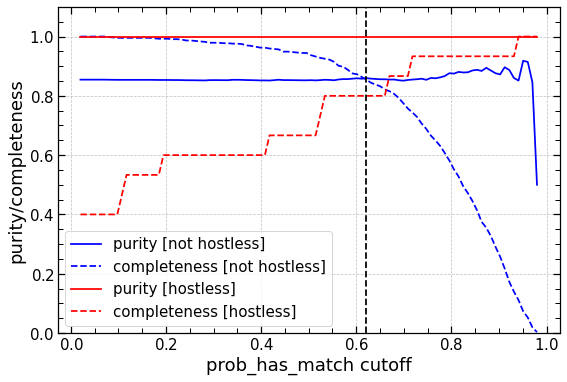

In [8]:
assess_goodnes_of_cross_match(nway_res_ero)